In [1]:
import torch
import torch.nn as nn

Exercise 64

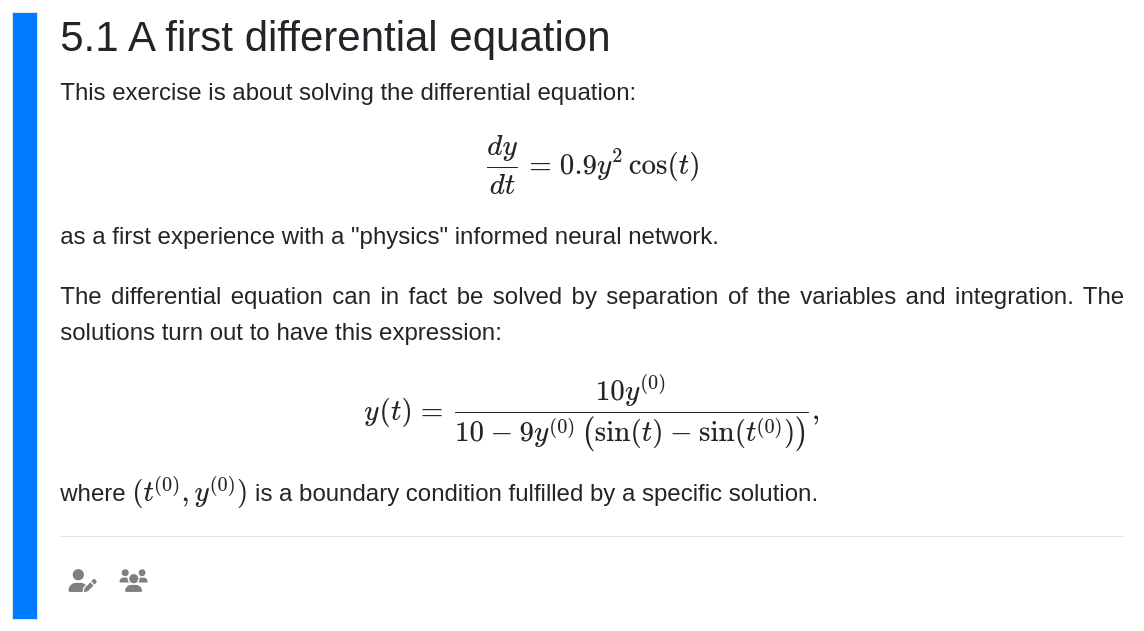

5.2 The model with derivative

a) Write a Pytorch model that implements calculating a function and its derivative based on a fully connected feed forward linear model with activation.

In [5]:
class FunctionWithDerivative(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FunctionWithDerivative, self).__init__()
        self.layer1 = nn.Linear(input_dim, hidden_dim)
        self.activation = nn.ReLU()  # Example activation function
        self.layer2 = nn.Linear(hidden_dim, output_dim)
    
    def forward(self, x):
        x.requires_grad_(True)
        
        # Forward pass
        hidden = self.activation(self.layer1(x))
        func_value = self.layer2(hidden)
        
        # Compute the gradient (derivative) of the output w.r.t the input
        derivative = torch.autograd.grad(
            outputs=func_value,
            inputs=x,
            grad_outputs=torch.ones_like(func_value),
            create_graph=True
        )[0]
        
        return func_value, derivative

In [6]:
# Hyperparameters
input_dim = 1  # For simplicity, a scalar input
hidden_dim = 10
output_dim = 1  # Scalar output

# Initialize the model
model = FunctionWithDerivative(input_dim, hidden_dim, output_dim)

# Input tensor
x = torch.tensor([[2.0]], requires_grad=True)  # Batch size of 1 with scalar input

# Compute function and its derivative
func_value, derivative = model(x)

# Print results
print("Function Value:", func_value)
print("Derivative:", derivative)


Function Value: tensor([[0.7283]], grad_fn=<AddmmBackward0>)
Derivative: tensor([[0.3662]], grad_fn=<TBackward0>)
